<center><img alt="" src="images/cover_sna.png"/></center> 
<center><h1><strong>Taufik Sutanto</strong></h1></center>
<center><h2><strong><font color="blue">tau-data Indonesia</font></strong></h2></center>
<center><h2><strong><font color="blue">http://tau-data.id/sna-01/</font></strong></h2></center>

# <font color="blue">Outline:</font>

* Basic Graph in NetworkX (Python)
 - Creating Graph (adding nodes & Edges, and weights)
 - Basic Visualization
 - Degree, shortest path, Spanning Tree
* Social Network Analytics
 - Community Detection
 - Partition Analysis
 - Centrality Analysis
 - Advanced Visualization

In [ ]:
!pip install unidecode pyLDAvis
try:
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/data_sna.csv
except:
    pass

In [4]:
# import beberapa module yg dibutuhkan di WorkShop ini:

import graphviz, warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

In [5]:
# Di NetworkX: inisialisasi graph kosong dilakukan seperti ini:
G1 = nx.Graph() # Di kesempatan ini Graph tak Berarah ini yang akan lebih banyak kita gunakan
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [6]:
G = nx.complete_graph(5)
G

In [7]:
# Contoh
pos = nx.spiral_layout(G)
pos

{0: array([-0.40244518, -0.70883392]),
 1: array([ 0.00478817, -0.56018214]),
 2: array([ 0.26069787, -0.15027624]),
 3: array([0.24467024, 0.4192923 ]),
 4: array([-0.1077111,  1.       ])}

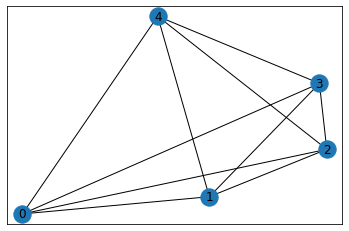

In [8]:
# Menggambar
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

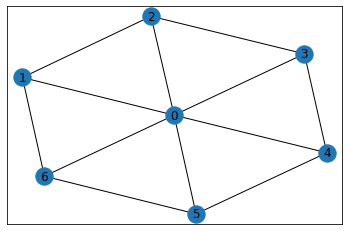

In [9]:
# Contoh lain
G = nx.wheel_graph(7)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

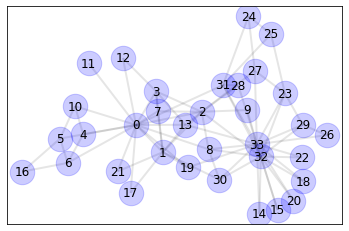

In [10]:
# Contoh lain lagi
import networkx as nx, matplotlib.pyplot as plt

g = nx.karate_club_graph()

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [11]:
for node in g.edges(data=True):
    print(node)
    break

(0, 1, {})


In [66]:
for u,v in g.edges():
    print(u,v, end=', ')

0 1, 0 2, 0 3, 0 4, 0 5, 0 6, 0 7, 0 8, 0 10, 0 11, 0 12, 0 13, 0 17, 0 19, 0 21, 0 31, 1 2, 1 3, 1 7, 1 13, 1 17, 1 19, 1 21, 1 30, 2 3, 2 7, 2 8, 2 9, 2 13, 2 27, 2 28, 2 32, 3 7, 3 12, 3 13, 4 6, 4 10, 5 6, 5 10, 5 16, 6 16, 8 30, 8 32, 8 33, 9 33, 13 33, 14 32, 14 33, 15 32, 15 33, 18 32, 18 33, 19 33, 20 32, 20 33, 22 32, 22 33, 23 25, 23 27, 23 29, 23 32, 23 33, 24 25, 24 27, 24 31, 25 31, 26 29, 26 33, 27 33, 28 31, 28 33, 29 32, 29 33, 30 32, 30 33, 31 32, 31 33, 32 33, 

## Untuk graphics Graph yang lebih baik lagi: **GraphViz**

### Bisa untuk Analisa graph Kurikulum

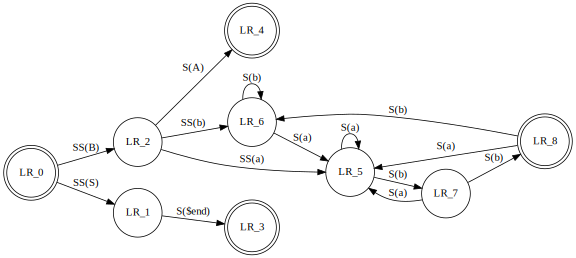

In [13]:

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f.view()


with open("fsm.gv") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


## Membangun Graph

## Menambahkan vertex, node, dan weights

In [14]:
G = nx.Graph() # Graph Kosong
G

In [15]:
G.nodes(), G.edges()

(NodeView(()), EdgeView([]))

In [16]:
# ini adalah cara sederhana menambahkan node ke graph satu persatu
G.add_node(1)
G.add_node(99)
G.add_node(1) # "Himpunan"
print(G.nodes())

[1, 99]


In [17]:
# ini cara menambahkan array of vertices ke Graph kita
V = [1,2,5,6,8,33,65,88] # vertices

for vertex in V:
    G.add_node(vertex)
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88]
[]


In [18]:
# ini cara menambahkan Edge secara manual satu per satu
G.add_edge(5, 8)
G.add_edge(8, 65)
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88]
[(5, 8), (8, 65)]


In [19]:
# Kita bisa menambahkan edge walaupun di Graph kita belum ada vertexnya, vertex tersebut akan automatis ditambahkan ke graphnya
# ini cara menambahkan Edge secara manual satu per satu
# misal di contoh ini vertex 77 dan vertex "A" tidak ada sebelumnya di Graph G
G.add_edge(77, 8)
G.add_edge('Depok', 88)
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88, 77, 'Depok']
[(5, 8), (8, 65), (8, 77), (88, 'Depok')]


In [20]:
# ini memahami bagaimana looping atas Array dari pasangan terurut dilakukan di python
E = [(1,33), (1,88), (6,88), (2,5), (2,8)]

for sisi in E:
    print(sisi[0])

for sisi in E:
    print(sisi[1])

1
1
6
2
2
33
88
88
5
8


In [21]:
# Ini adalah cara menambahkan Edge di Graph dengan loop
for sisi in E:
    G.add_edge(sisi[0], sisi[1])
print( G.nodes() )
print( G.edges() )

[1, 99, 2, 5, 6, 8, 33, 65, 88, 77, 'Depok']
[(1, 33), (1, 88), (2, 5), (2, 8), (5, 8), (6, 88), (8, 65), (8, 77), (88, 'Depok')]


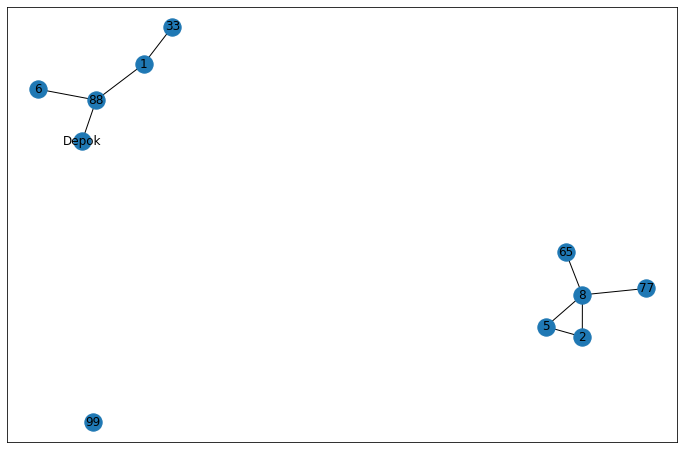

In [22]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

In [23]:
# Cara lain

G = nx.Graph() # Graph Kosong Baru
V = [1, 2, 7, 9, 12, 19] # Bisa juga string, misal "A" atau nama "Budi"
E = [(1,2), (2,19), (9,2), (9,1), (2,8), (8,10), (12,7),(7,2), (7,9)] # Perhatikan "8" dan "10" TIDAK ADA di V

G.add_nodes_from(V)
G.add_edges_from(E)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  8
Banyak Edges =  9


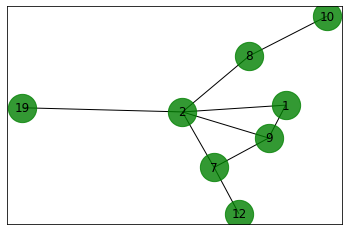

In [24]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

# Manipulasi graph: Menghapus Node atau sub-graph

In [25]:
v = [7, 12, 19]
G.remove_nodes_from(v)

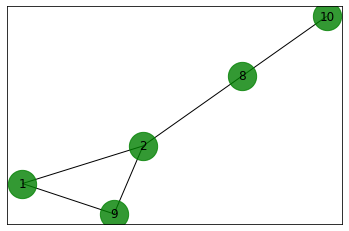

In [26]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()

## Remove Edges

In [27]:
E = [(1,9)]
G.remove_edges_from(E)

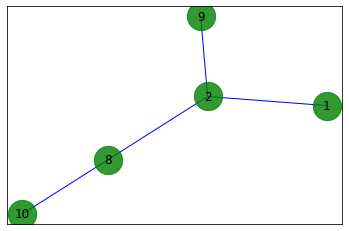

In [28]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.8,node_color='green',node_size=800) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos, edge_color='blue') # ini menggambar edge di graph G
plt.show()

## Adding Graph weights/properties

In [29]:
V = ['Depok', 'Jakarta','Bogor','Bekasi', 'Tangerang']
Vluas = [12.3, 44.5, 1.2, 0.6, 23] # contoh parameter "luas"

E = [('Depok','Bogor'), ('Jakarta','Bekasi'), ('Bekasi','Bogor'),('Depok','Bekasi'),('Tangerang','Bekasi')] # ini adalah edgenya
Ejrk = [22.4, 1.2, 5.6, 7.8, 9] # ini "contoh" nanti jadi parameter ke-2 dari setiap Edge di E


G = nx.Graph() # graph sebelumnya tertimpa dan jadi Graph kosong kembali
# Kemudian kita akan tambahkan vertex, edge, beserta setiap parameter yg didefinisikan di atas ke graph G
for vertex, area in zip(V, Vluas):
  G.add_node(vertex, luas=area) # nama variable parameter di setiap vertexnya di contoh ini adalah "waktu" dan "orang"
  
for sisi, dist in zip(E, Ejrk):
  G.add_edge(sisi[0], sisi[1], jarak=dist)

print( G.nodes() )
print( G.edges() )
print('Luas Depok = ', G.nodes['Depok']['luas'])

['Depok', 'Jakarta', 'Bogor', 'Bekasi', 'Tangerang']
[('Depok', 'Bogor'), ('Depok', 'Bekasi'), ('Jakarta', 'Bekasi'), ('Bogor', 'Bekasi'), ('Bekasi', 'Tangerang')]
Luas Depok =  12.3


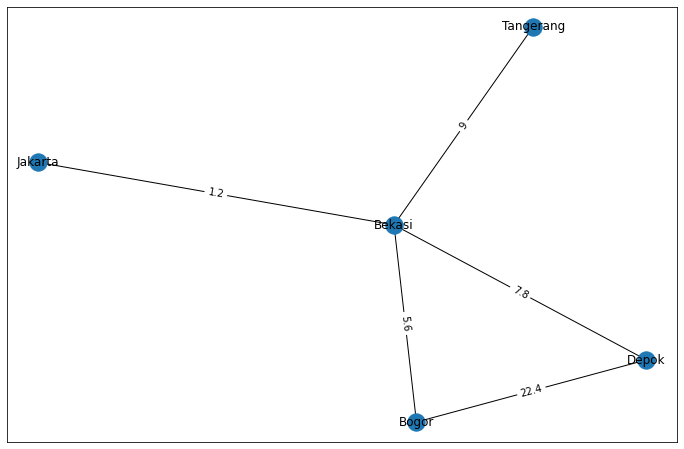

In [30]:
plt.subplots(figsize=(12,8))


pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'jarak')) # ini label dari edgenya
plt.show()

In [31]:
d = nx.degree(G)
d

DegreeView({'Depok': 2, 'Jakarta': 1, 'Bogor': 2, 'Bekasi': 4, 'Tangerang': 1})

In [32]:
[d[node] for node in G.nodes()]

[2, 1, 2, 4, 1]

## Menggunakan degree untuk membuat gambar graph yang lebih baik

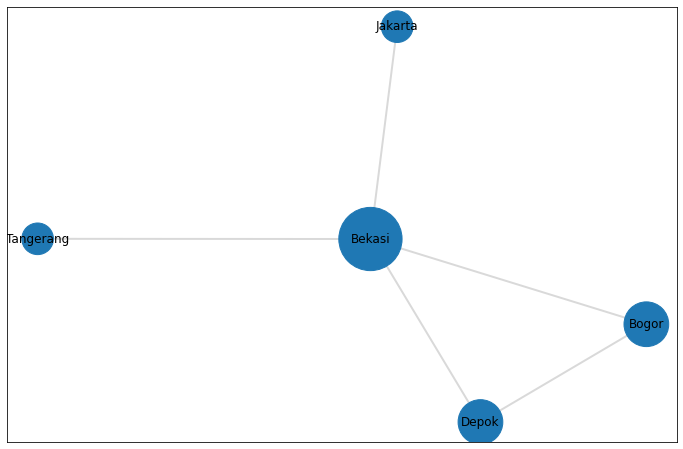

In [33]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(G) # Spring LayOut

D = [d[node]*1000 for node in G.nodes()]
nx.draw_networkx_nodes(G,pos,node_size=D) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.15) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

## Menambahkan informasi warna

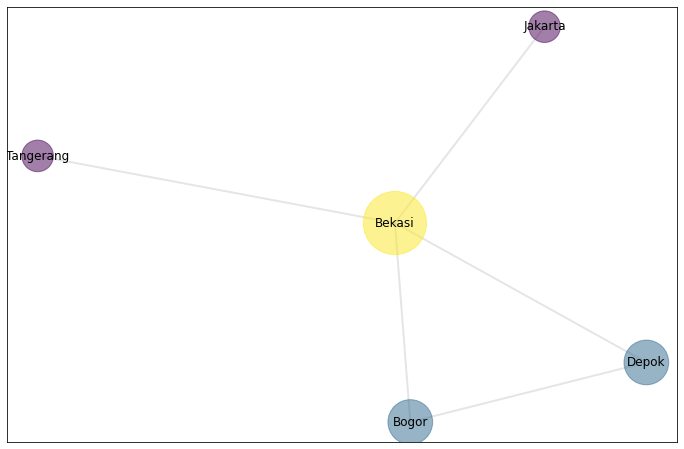

In [34]:
plt.subplots(figsize=(12,8))

warna = D
pos = nx.spring_layout(G) # Spring LayOut
nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=D, alpha=0.5) # Gambar Vertex
nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [35]:
SP = nx.shortest_path(G, source='Jakarta', target='Bogor')
SP

['Jakarta', 'Bekasi', 'Bogor']

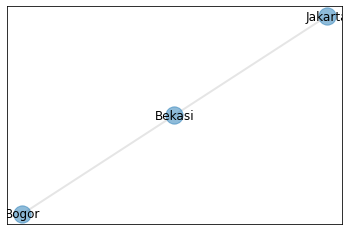

In [36]:
H = G.subgraph(SP)

pos = nx.spring_layout(H) # Spring LayOut
nx.draw_networkx_nodes(H,pos,alpha=0.5) # Gambar Vertex
nx.draw_networkx_edges(H,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(H,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [38]:
# import data
f = 'data/data_sna.csv'
df = pd.read_csv(f)
df.head()

,Time,Username,Tweet,Replies,Retweets,Likes,Language,urlStatus
0,24 Sep 2017,@paultan,Mitsubishi Xpander rendered with Nissan X-Trai...,0,1,1,NaN,https://twitter.com/paultan/status/91220312337...
1,23 Oct 2017,@MyBIZ5,New post (ALL NEW MITSUBISHI XPANDER VS HYUNDA...,0,0,0,NaN,https://twitter.com/MyBIZ5/status/922713812121...
2,23 Oct 2017,@eko_wiwit,3 Paket Accessories Resmi Mitsubishi Xpander h...,0,0,0,NaN,https://twitter.com/eko_wiwit/status/922675754...
3,20 Oct 2017,@LMCAutomotive,New Mitsubishi Xpander triggers drop in August...,0,1,1,NaN,https://twitter.com/LMCAutomotive/status/92134...
4,22 Oct 2017,@MyBIZ5,New post (Review Mitsubishi xpander) has been ...,0,0,0,NaN,https://twitter.com/MyBIZ5/status/922059555298...


In [40]:
Tweets = df[' Tweet'].tolist()
Tweets[:5]

['Mitsubishi Xpander rendered with Nissan X-Trail bits https://goo.gl/fb/fiSzNp\xa0',
 'New post (ALL NEW MITSUBISHI XPANDER VS HYUNDAI STAREX ROYALE 2018) has been published on Best Images ... - https://www.winterbluemusic.com/all-new-mitsubishi-xpander-vs-hyundai-starex-royale-2018/\xa0…pic.twitter.com/6XVoFEh4QR',
 '3 Paket Accessories Resmi Mitsubishi\xa0Xpander https://mitsubishiexpanderjember.wordpress.com/2017/10/24/3-paket-accessories-resmi-mitsubishi-xpander/\xa0…pic.twitter.com/WUPJM5be5P',
 'New Mitsubishi Xpander triggers drop in August Indonesian LV sales as buyers wait for delivery of the new model: https://www.lmc-auto.com/wp-content/uploads/2017/10/LMCA-ASEAN-Light-Vehicle-Sales-Update-September-2017.pdf\xa0…',
 'New post (Review Mitsubishi xpander) has been published on Best Images Collections HD For Gadget windows Mac ... - https://www.winterbluemusic.com/review-mitsubishi-xpander/\xa0…pic.twitter.com/H8BDfLPYMb']

In [41]:
Usernames = df[' Username'].tolist()
Usernames[:5]

['@paultan', '@MyBIZ5', '@eko_wiwit', '@LMCAutomotive', '@MyBIZ5']

Please wait, building Graph .... 


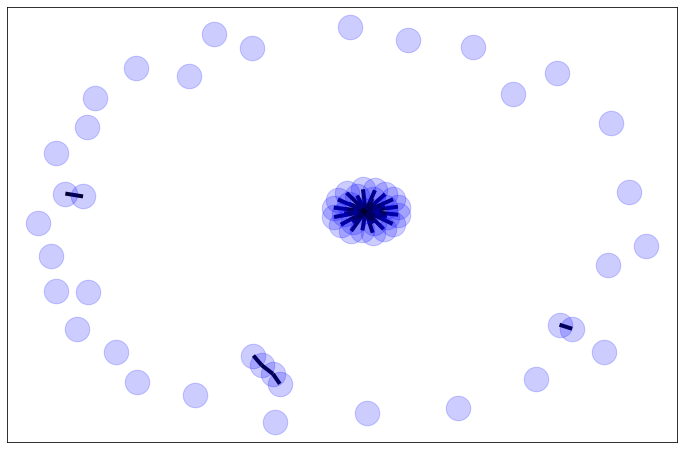

Finished. There are 62 nodes and 29 edges in the Graph.


In [42]:
# Draw the Tweet Graph
plt.subplots(figsize=(12,8))

G = tau.Graph([Usernames,Tweets], Label = False, layOut='spring', plain=True) # layOut = spring, circular, random, shells, spectral

In [43]:
# Let's now examine, who are the most "important" users in this Graph?
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', 'Mitsubishi', '@rajufebrian', 'gmail', '@fadlyjamil', '@cakdan', '@AutonetMagz', '@waykuyaa', '@BangNiko', '@autogalaxy9']
Influencial Users Scores: [0.39344262 0.03278689 0.03278689 0.01639344 0.01639344 0.01639344
 0.01639344 0.01639344 0.01639344 0.01639344]


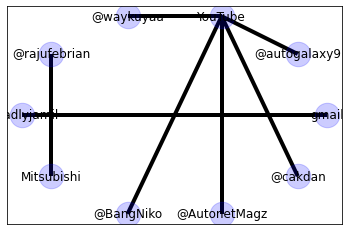

In [44]:
tau.drawGraph(Gt, True, layOut='circular')

In [45]:
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', '@cakdan', '@AutonetMagz', '@waykuyaa', '@BangNiko', '@autogalaxy9', '@sj_bagus', '@antaranews', '@erlan_peetex', '@AnnissaEka']
Influencial Users Scores: [0.39344262 0.20090687 0.20090687 0.20090687 0.20090687 0.20090687
 0.20090687 0.20090687 0.20090687 0.20090687]


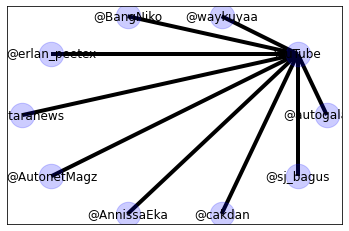

In [46]:
tau.drawGraph(Gt, True, layOut='circular')

In [47]:
Gt = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', 'Mitsubishi', '@rajufebrian', '@DapurPacu', 'gmail', '@fadlyjamil', '@Hardiansyah1303', '@fullspecprice', '@cakdan', '@autodealersa']
Influencial Users Scores: [0.15081967 0.0010929  0.0010929  0.         0.         0.
 0.         0.         0.         0.        ]


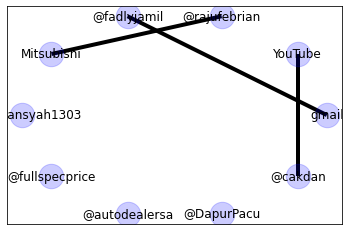

In [48]:
tau.drawGraph(Gt, True, layOut='circular')

In [49]:
Gt = tau.Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['YouTube', '@antaranews', '@H2HATDC', '@Tiyooneheart', '@m_riskimiranto', '@cakdan', '@AutonetMagz', '@waykuyaa', '@sj_bagus', '@AndikaAhmad_']
Influencial Users Scores: [0.70710678 0.14433757 0.14433757 0.14433757 0.14433757 0.14433757
 0.14433757 0.14433757 0.14433757 0.14433757]


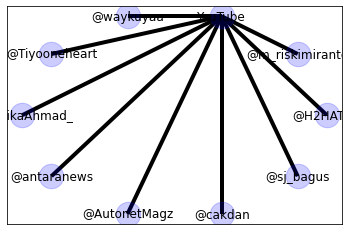

In [50]:
tau.drawGraph(Gt, True, layOut='circular')

# Centrality dapat digunakan untuk membuat visualisasi graph yang lebih baik

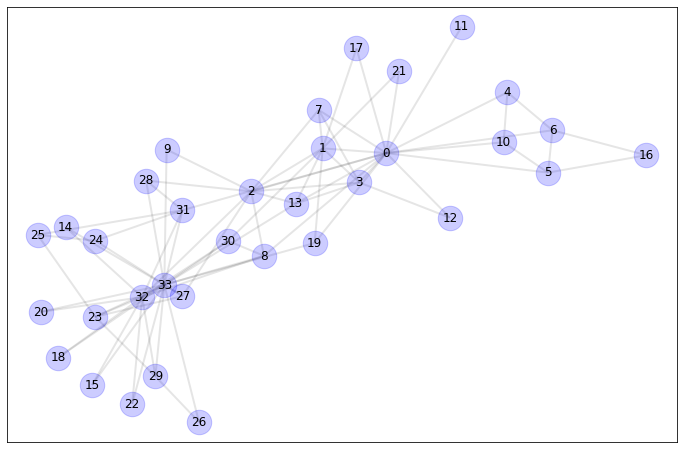

In [51]:
plt.subplots(figsize=(12,8))

g = nx.karate_club_graph()

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, alpha=0.2,node_color='blue',node_size=600) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

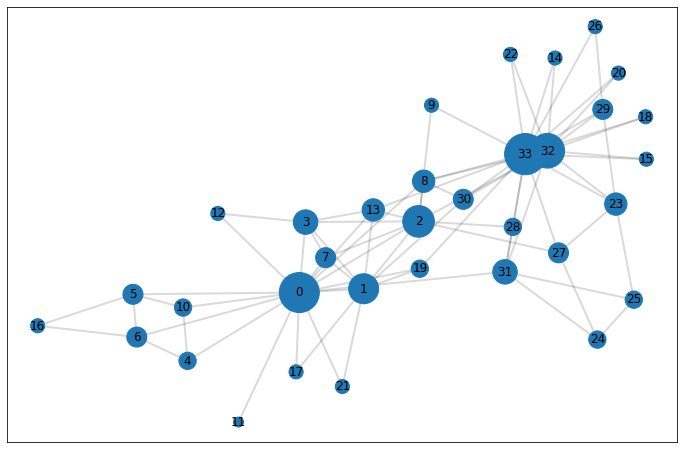

In [52]:
# Menggunakan Centrality measure (misal degree) untuk merubah ukuran node
plt.subplots(figsize=(12,8))


K = 100 # Scale factor
d = nx.degree(g) 
d = [d[node]*K for node in g.nodes()]

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.15) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [53]:
print(d)

[1600, 900, 1000, 600, 300, 400, 400, 400, 500, 200, 300, 100, 200, 500, 200, 200, 200, 200, 200, 300, 200, 200, 200, 500, 300, 300, 200, 400, 300, 400, 400, 600, 1200, 1700]


In [54]:
# Menggunakan tingkat "kepentingan" sebagai warna
ranking = nx.degree_centrality(g)
warna = list(ranking.values())
print(warna)

[0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.06060606060606061, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.15151515151515152, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.18181818181818182, 0.36363636363636365, 0.5151515151515151]


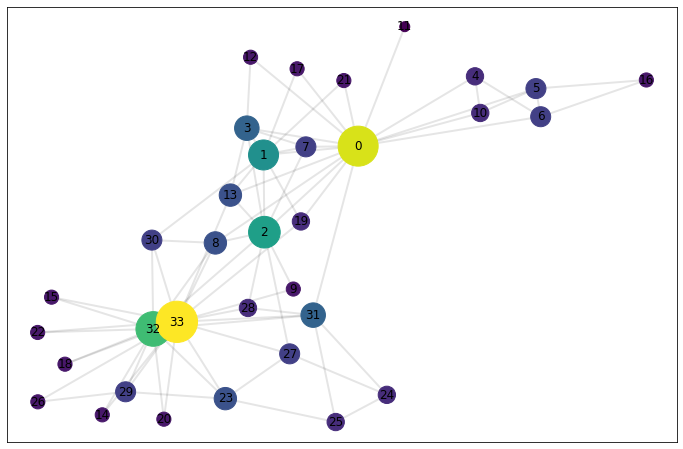

In [55]:
plt.subplots(figsize=(12,8))

pos = nx.spring_layout(g) # Spring LayOut
nx.draw_networkx_nodes(g,pos, node_color=warna,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [56]:
B = nx.algorithms.community.kernighan_lin_bisection(g)
B

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [57]:
warna = []
for v in B[0]:
    warna.append(1)
for v in B[1]:
    warna.append(2)

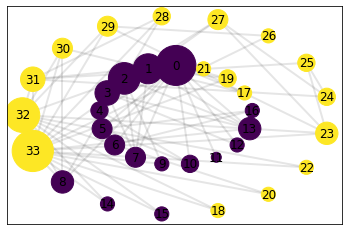

In [58]:
pos = nx.shell_layout(g, B)
nx.draw_networkx_nodes(g,pos, node_color=warna,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [59]:
# WARNING!!!... Hanya bisa jika networkX versi 2.2 ke atas 
M = nx.algorithms.community.greedy_modularity_communities(g)
print(M)

[frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 4, 5, 6, 10, 11, 16, 19})]


In [60]:
W = []
warna = 1
for module in M:
    for node in module:
        W.append(warna)
    warna = warna +1
print(W)

K = 100 # Scale factor
d = nx.degree(g) 
d = [d[node]*K for node in g.nodes()]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


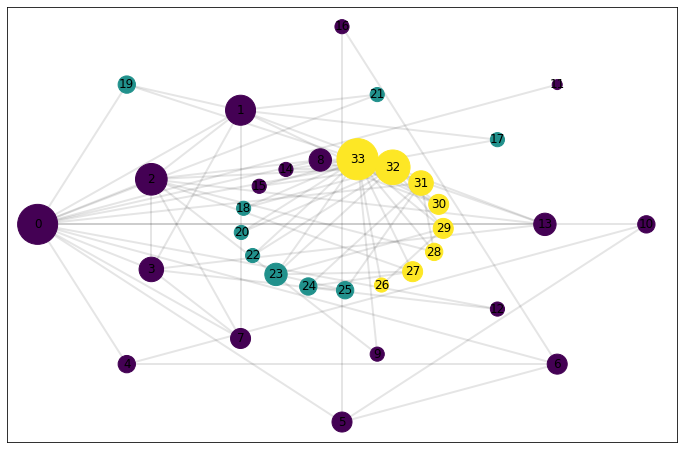

In [61]:
plt.subplots(figsize=(12,8))


pos = nx.shell_layout(g, M)
nx.draw_networkx_nodes(g,pos, node_color=W,node_size=d) # Gambar Vertex
nx.draw_networkx_edges(g,pos,width=2,alpha=0.1) # Gambar edges
nx.draw_networkx_labels(g,pos) #Gambar Label Nodes
plt.show() # Show the graph

In [68]:
# Clustering pada Graph = Community Detection
Gt = nx.algorithms.community.greedy_modularity_communities(G)
for community in Gt:
    print(community)

frozenset({'@m_riskimiranto', 'YouTube', '@Sports_car_new', '@xanggaa', '@otodriver', '@waykuyaa', '@dailykurnia', '@erlan_peetex', '@AndikaAhmad_', '@MobilQ2', '@RizkyAkbar_H', '@Bobi_Tan77', '@autogalaxy9', '@rizkyprawinto', '@wienmunawar', '@BangNiko', '@Satoerawa', '@antaranews', '@AutonetMagz', '@cakdan', '@H2HATDC', '@Tiyooneheart', '@irfan2pac', '@AnnissaEka', '@sj_bagus'})
frozenset({'carvaganza', '@rajufebrian', '@BetweenTheAxles', 'Mitsubishi'})
frozenset({'katalogpromosip', '@oneeast_id'})
frozenset({'gmail', '@fadlyjamil'})
frozenset({'@paultan'})
frozenset({'@MyBIZ5'})
frozenset({'@eko_wiwit'})
frozenset({'@LMCAutomotive'})
frozenset({'@paula_anindia'})
frozenset({'@AUN_OFFICIAL'})
frozenset({'@waroengkezia'})
frozenset({'@carmagz_hd'})
frozenset({'@BasitMitsubishi'})
frozenset({'@Mitsubishi_ID'})
frozenset({'@bosowa_berlian'})
frozenset({'@mitsubishibmm'})
frozenset({'@max_memo2000'})
frozenset({'@AsmatMitsubishi'})
frozenset({'@indianautos'})
frozenset({'@PRio_Mitsubishi

# <center><font color="blue"> End of Module.

<hr />
